## Lecture CSV

In [1]:
import plotly.express as px
import pandas as pd

In [2]:
# Lecture du CSV
df_sd = pd.read_csv("../datas/SpeedDatingData.csv", encoding = "ISO-8859-1")
df_sd.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


---

## Analyse - Axe 4

### Un secteur d'activité professionnel commun influence-t-il une rencontre ?

#### Rappel de la répartition du secteur d'activité professionnel

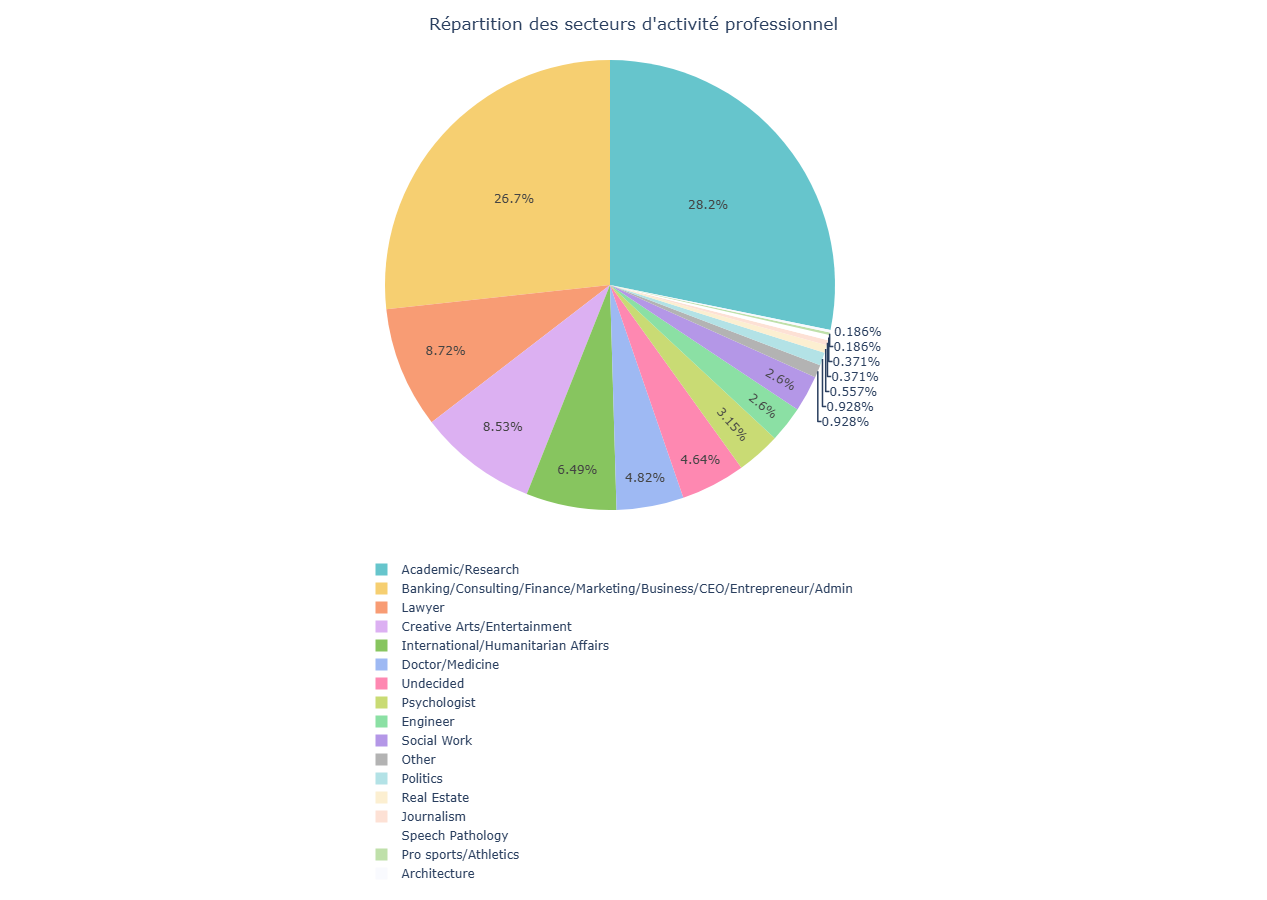

Je veux comparer le secteur professionnel d'un participant et de son partenaire.

Je crée donc un dataframe avec les secteurs d'activité de chacun et une variable booléenne qui me dira si oui ou non ce secteur est commun.

In [3]:
# Sélection des colonnes pertinentes pour l'analyse : iid + pid + career_c + match
columns_to_keep = ["iid", "pid", "career_c", "match"]

# Vérifier les valeurs manquantes
missing_values = df_sd[columns_to_keep].isnull().sum()
print("Valeurs manquantes : ")
print(missing_values)

print("")

print("Pourcentage de valeurs manquantes : ")
print(100 * missing_values / df_sd.shape[0])

Valeurs manquantes : 
iid           0
pid          10
career_c    138
match         0
dtype: int64

Pourcentage de valeurs manquantes : 
iid         0.000000
pid         0.119360
career_c    1.647171
match       0.000000
dtype: float64


J'ai peu de valeurs manquantes, je peux donc les supprimer.

In [4]:
print("Nombre de lignes avant suppression : {}".format(df_sd[columns_to_keep].shape[0]))

# Suppression des lignes avec des valeurs manquantes
df_sd_clean = df_sd[columns_to_keep].dropna()

print("Nombre de lignes après suppression : {}".format(df_sd_clean.shape[0]))

# Vérifier que les valeurs manquantes ont été remplacées
df_sd_clean.isnull().sum()

Nombre de lignes avant suppression : 8378
Nombre de lignes après suppression : 8230


iid         0
pid         0
career_c    0
match       0
dtype: int64

In [5]:
# Secteur d'activité du partenaire
df_sd_partners = df_sd_clean[["pid", "career_c"]]
df_sd_partners.columns = ["iid", "career_c_partner"]

# Fusionner pour avoir les secteurs du participant et du partenaire
df_sd_career_merged = df_sd_clean.merge(df_sd_partners, on="iid")

# Créer la colonne common_career
df_sd_career_merged["common_career"] = (df_sd_career_merged["career_c"] == df_sd_career_merged["career_c_partner"])

df_sd_career_merged.head()

,iid,pid,career_c,match,career_c_partner,common_career
0,4,11.0,1.0,0,2.0,False
1,4,11.0,1.0,0,1.0,True
2,4,11.0,1.0,0,1.0,True
3,4,11.0,1.0,0,1.0,True
4,4,11.0,1.0,0,1.0,True


#### Influence d'un secteur professionnel commun sur les matchs

In [6]:
# Calculer la proportion de matchs selon le secteur commun
taux_match = df_sd_career_merged.groupby("common_career")["match"].mean().reset_index()
taux_match["common_career"] = taux_match["common_career"].map({True: "Secteur professionnel commun", False: "Secteur professionnel différent"})

fig = px.bar(taux_match, x="common_career", y="match",
             labels={"match": "Taux de match"},
             text="match", color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title="Influence d’un secteur professionnel commun sur les matchs", title_x=0.5, xaxis_title=None)
fig.update_traces(texttemplate="%{text:.2%}")
fig.show()

Analyse

Sur ce barplot on observe que les taux de match sont très proches entre les deux groupes.

Cela signifie que les matchs ne diffèrent pas beaucoup entre les cas où les participants ont des secteurs professionnels communs ou non. 

En d'autres termes, cette métrique ne semble pas être un facteur discriminant fort.